## Random Forest - Credit Default Prediction

#### Import Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation - X / y

In [4]:
df = df.drop('ID',axis=1)

In [5]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [6]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

In [7]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: defaulted, Length: 30000, dtype: int64

In [9]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


## Building our first Random Forest Model with Default hyperparameters

In [10]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [11]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [12]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# Making predictions
predictions = rfc.predict(X_test)

In [14]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [15]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7058
           1       0.64      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [16]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6656  402]
 [1240  702]]


In [17]:
print(accuracy_score(y_test,predictions))

0.8175555555555556


## Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node.
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [18]:
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 10, 1)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10)}, return_train_score=True,
             scoring='accuracy')

In [19]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.935024,0.007590,0.036004,0.000843,2,{'max_depth': 2},0.801429,0.803810,0.800714,0.796905,...,0.800381,0.002316,8,0.799286,0.799583,0.802381,0.802560,0.801429,0.801048,0.001375
1,1.225661,0.010998,0.037748,0.000654,3,{'max_depth': 3},0.808810,0.811429,0.806667,0.801667,...,0.807190,0.003206,7,0.807976,0.807321,0.807381,0.807321,0.811012,0.808202,0.001426
2,1.461724,0.035306,0.040188,0.000732,4,{'max_depth': 4},0.813810,0.814286,0.810476,0.806667,...,0.810857,0.002879,6,0.812560,0.810655,0.813095,0.814643,0.813452,0.812881,0.001307
3,1.712542,0.009233,0.047310,0.003528,5,{'max_depth': 5},0.814048,0.817619,0.812381,0.810952,...,0.813762,0.002225,5,0.815119,0.815595,0.816726,0.818333,0.819524,0.817060,0.001656
4,1.956865,0.021600,0.050203,0.004129,6,{'max_depth': 6},0.815000,0.820238,0.815714,0.809286,...,0.814476,0.003671,4,0.825655,0.822857,0.824167,0.819583,0.822083,0.822869,0.002042


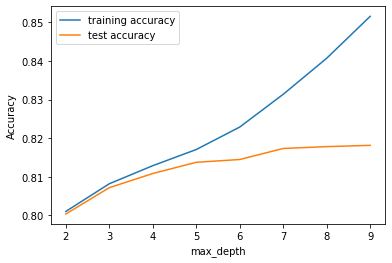

In [20]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [21]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 150)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5), n_jobs=-1,
             param_grid={'n_estimators': range(100, 1000, 150)},
             return_train_score=True, scoring='accuracy')

In [22]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.773943,0.012446,0.045011,0.000668,100,{'n_estimators': 100},0.811667,0.813571,0.815714,0.808095,...,0.812095,0.002526,5,0.813333,0.814464,0.819762,0.815655,0.815536,0.815750,0.002175
1,4.460798,0.032144,0.132324,0.007464,250,{'n_estimators': 250},0.815476,0.816429,0.812143,0.806667,...,0.812952,0.003459,2,0.817738,0.816786,0.816131,0.815119,0.818750,0.816905,0.001257
2,7.484478,0.090093,0.188603,0.001166,400,{'n_estimators': 400},0.815000,0.815476,0.812857,0.807381,...,0.812952,0.002926,2,0.816905,0.815893,0.816310,0.816429,0.818452,0.816798,0.000888
3,10.584090,0.102426,0.257397,0.005149,550,{'n_estimators': 550},0.813810,0.815714,0.812381,0.808571,...,0.812286,0.002436,4,0.815298,0.815655,0.815952,0.815833,0.816607,0.815869,0.000430
4,13.171532,0.299585,0.276075,0.031887,700,{'n_estimators': 700},0.814762,0.817619,0.812857,0.808095,...,0.813333,0.003101,1,0.816190,0.818155,0.816667,0.816548,0.818036,0.817119,0.000813


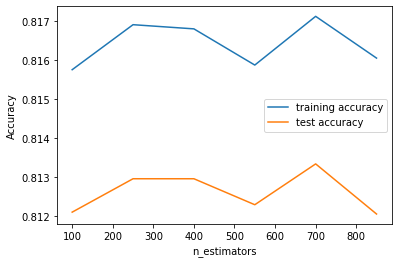

In [23]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [24]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=700),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [25]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.588995,0.050956,0.357166,0.002797,4,{'max_features': 4},0.815000,0.815714,0.813095,0.807619,...,0.812857,0.002837,4,0.818690,0.815774,0.816429,0.815774,0.817917,0.816917,0.001183
1,23.774776,0.039627,0.364253,0.004007,8,{'max_features': 8},0.817381,0.820238,0.820476,0.818095,...,0.818952,0.001210,3,0.823869,0.822500,0.823095,0.823750,0.824167,0.823476,0.000601
2,35.368387,1.780970,0.263068,0.013420,14,{'max_features': 14},0.817857,0.821429,0.819048,0.818810,...,0.819048,0.001269,2,0.824762,0.823155,0.823274,0.824821,0.825536,0.824310,0.000936
3,40.872853,2.023910,0.176401,0.010580,20,{'max_features': 20},0.818095,0.822619,0.819048,0.820238,...,0.819810,0.001561,1,0.825417,0.823869,0.823750,0.825833,0.826190,0.825012,0.001013
4,0.436099,0.012887,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


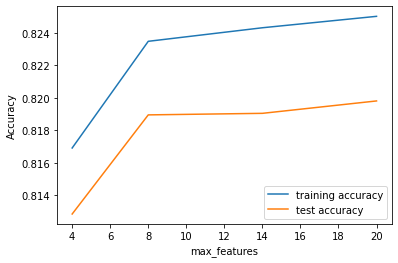

In [26]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [27]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [28]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.570460,0.042151,0.316717,0.001833,100,{'min_samples_leaf': 100},0.815238,0.821190,0.819286,0.816429,...,0.817714,0.002190,3,0.819583,0.819107,0.819643,0.820119,0.818988,0.819488,0.000407
1,21.108101,0.063254,0.312542,0.001288,150,{'min_samples_leaf': 150},0.815952,0.820952,0.819524,0.816190,...,0.817714,0.002111,2,0.818750,0.818155,0.818869,0.819107,0.818690,0.818714,0.000314
2,20.843487,0.162313,0.322282,0.005510,200,{'min_samples_leaf': 200},0.815952,0.820952,0.819762,0.816190,...,0.817762,0.002154,1,0.818810,0.818095,0.818333,0.819107,0.818690,0.818607,0.000356
3,20.632712,0.088645,0.317950,0.002100,250,{'min_samples_leaf': 250},0.815952,0.820238,0.819524,0.815714,...,0.817524,0.001944,5,0.818810,0.818036,0.818750,0.819107,0.819048,0.818750,0.000382
4,18.982532,2.735248,0.294565,0.048814,300,{'min_samples_leaf': 300},0.815714,0.821429,0.819286,0.815714,...,0.817619,0.002338,4,0.818393,0.818214,0.818452,0.819167,0.819643,0.818774,0.000542


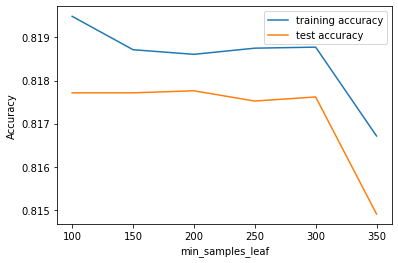

In [29]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [30]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5, n_estimators=700, max_features=8, min_samples_leaf=200)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=8,
                                              min_samples_leaf=200,
                                              n_estimators=700),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [31]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.003942,0.042857,0.331447,0.002679,200,{'min_samples_split': 200},0.815952,0.820952,0.819286,0.816429,...,0.817667,0.002083,6,0.818750,0.817619,0.818155,0.819167,0.818810,0.818500,0.000547
1,21.045697,0.074256,0.333092,0.002970,250,{'min_samples_split': 250},0.816190,0.821429,0.819762,0.816190,...,0.817857,0.002304,5,0.818810,0.817857,0.818333,0.819286,0.818869,0.818631,0.000491
2,21.317864,0.254645,0.324344,0.007383,300,{'min_samples_split': 300},0.816190,0.821905,0.820476,0.816429,...,0.818143,0.002539,2,0.818750,0.817857,0.818036,0.819167,0.818810,0.818524,0.000496
3,21.493365,0.054891,0.322206,0.002605,350,{'min_samples_split': 350},0.815952,0.821905,0.819762,0.816190,...,0.817905,0.002490,4,0.818929,0.817560,0.818274,0.818929,0.818810,0.818500,0.000529
4,20.014950,3.022975,0.298541,0.046502,400,{'min_samples_split': 400},0.815952,0.821905,0.820714,0.816190,...,0.818143,0.002614,1,0.818869,0.817440,0.818095,0.819286,0.818690,0.818476,0.000644


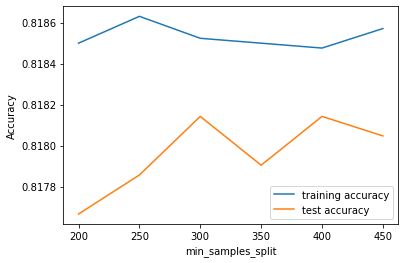

In [32]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [33]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,8,1],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,1000, 150], 
    'max_features': [5, 10, 1]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)

In [34]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  7.7min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 8, 1], 'max_features': [5, 10, 1],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 1000, 150]},
             return_train_score=True, verbose=1)

In [35]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8184285714285714 using {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 150}


**Fitting the final model with the best parameters obtained from grid search.**

In [46]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=300,
                             max_features=10,
                             n_estimators=150)

In [47]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=10, min_samples_leaf=100,
                       min_samples_split=300, n_estimators=150)

In [48]:
# predict
predictions = rfc.predict(X_test)

In [49]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.46      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [51]:
print(confusion_matrix(y_test,predictions))

[[6756  302]
 [1263  679]]


Feature: 0, Score: 0.00145
Feature: 1, Score: 0.00002
Feature: 2, Score: 0.00010
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00068
Feature: 5, Score: 0.49780
Feature: 6, Score: 0.23670
Feature: 7, Score: 0.09688
Feature: 8, Score: 0.05766
Feature: 9, Score: 0.03432
Feature: 10, Score: 0.01622
Feature: 11, Score: 0.00462
Feature: 12, Score: 0.00189
Feature: 13, Score: 0.00101
Feature: 14, Score: 0.00055
Feature: 15, Score: 0.00035
Feature: 16, Score: 0.00052
Feature: 17, Score: 0.01697
Feature: 18, Score: 0.01192
Feature: 19, Score: 0.01369
Feature: 20, Score: 0.00435
Feature: 21, Score: 0.00115
Feature: 22, Score: 0.00100


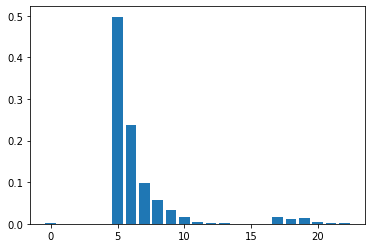

In [52]:
# Printing Features Importances

from matplotlib import pyplot
importance = rfc.feature_importances_
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Compare the results with a Decision Tree with similar Hyperparamaters

In [54]:
# Importing sklearn packages 

from sklearn.tree import DecisionTreeClassifier

dt_test = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100,
                                max_depth=3,
                             min_samples_leaf=100, 
                             min_samples_split=300,
                             max_features=10)
dt_test.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=10, min_samples_leaf=100,
                       min_samples_split=300, random_state=100)

In [55]:
# Predict & Score
y_pred = dt_test.predict(X_test)
print(dt_test.score(X_test, y_test))
print(classification_report(y_test, y_pred))

0.8264444444444444
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7058
           1       0.68      0.37      0.48      1942

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000

